#question 1 (conceptual):
Forward Pass for Regression. Consider a neural network with: Input: 1 feature , Hidden layer: 5 neurons (sigmoid activation) , Output layer: 1 neuron (linear activation, no sigmoid). Write the mathematical expressions for the hidden activations and the output.

Answer:
The pre-activation $z_{1j}$ for the $j$-th hidden neuron is:
$z_{1j} = w_{1j}x + b_{1j}$

The output $h_j$ of the $j$-th hidden neuron, after applying the sigmoid activation function $\sigma(\cdot)$, is:
$h_j = \sigma(z_{1j}) = \frac{1}{1 + e^{-z_{1j}}}$

This calculation is performed for each of the 5 hidden neurons ($j=1, 2, 3, 4, 5$).

The outputs from the hidden layer, $h_1, h_2, h_3, h_4, h_5$, serve as the inputs for the single neuron in the output layer. The output neuron has a linear activation, meaning we only compute the weighted sum.


Therfore
$$y^{̂̂}=∑_{i=0}^{5} {v_i}{h_i}+c$$


# Question 2 (conceptual):
Derive the gradient of $E(w)$ with respect to the weights of hidden layer and output layer.

### 2) Gradients of the Loss

We start with the loss function for a single datapoint:

$$
E = \tfrac{1}{2}(\hat{y} - y)^2
$$

So:

$$
\frac{\partial E}{\partial \hat{y}} = \hat{y} - y
$$

---

#### Output-layer weights and bias

For each output weight \(v_i\):

$$
\frac{\partial E}{\partial v_i} =
\frac{\partial E}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial v_i}
= (\hat{y} - y)h_i
$$

For the output bias \(c\):

$$
\frac{\partial E}{\partial c} =
\frac{\partial E}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial c}
= \hat{y} - y
$$

---

#### Hidden-layer weights and biases

We need the derivative through the sigmoid. For hidden unit \(i\):

$$
\sigma'(z_i) = h_i (1 - h_i)
$$

First compute derivative of \(E\) w.r.t. \(z_i\):

$$
\frac{\partial E}{\partial z_i} =
\frac{\partial E}{\partial \hat{y}} \cdot
\frac{\partial \hat{y}}{\partial h_i} \cdot
\frac{\partial h_i}{\partial z_i}
= (\hat{y} - y) v_i \, \sigma'(z_i)
= (\hat{y} - y) v_i \, h_i (1-h_i)
$$

Now derivatives w.r.t. the hidden weights \(w_i\) and biases \(b_i\).
Since \(z_i = w_i x + b_i\):

$$
\frac{\partial E}{\partial w_i} =
\frac{\partial E}{\partial z_i} \cdot \frac{\partial z_i}{\partial w_i}
= \Big((\hat{y} - y)v_i h_i(1-h_i)\Big) \cdot x
$$

$$
\frac{\partial E}{\partial b_i} =
\frac{\partial E}{\partial z_i} \cdot \frac{\partial z_i}{\partial b_i}
= (\hat{y} - y)v_i h_i(1-h_i)
$$



### Conclusion – Final Derivatives

#### Output Layer

$$
\frac{\partial E}{\partial v_i} = (\hat{y} - y)h_i,
\qquad
\frac{\partial E}{\partial c} = \hat{y} - y
$$

#### Hidden Layer

$$
\frac{\partial E}{\partial w_i} = (\hat{y} - y) v_i h_i (1-h_i) \, x,
\qquad
\frac{\partial E}{\partial b_i} = (\hat{y} - y) v_i h_i (1-h_i)
$$


### 3) Question 3 (conceptual):Backpropagation via Chain Rule

In a regression setup, the chain rule is used to propagate the error from the output back to the hidden layer. Step by step:

1. **Compute the derivative of the loss with respect to the output**:

$$
\frac{\partial E}{\partial \hat{y}} = \hat{y} - y
$$

This tells us how the error changes with the predicted output.

2. **Propagate the error to the output weights and bias**:

For each output weight \(v_i\):

$$
\frac{\partial E}{\partial v_i} = \frac{\partial E}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial v_i} = (\hat{y} - y) h_i
$$

For the output bias \(c\):

$$
\frac{\partial E}{\partial c} = \frac{\partial E}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial c} = \hat{y} - y
$$

3. **Compute the error signal at each hidden unit**:

The chain rule allows us to compute how the loss changes with respect to the hidden unit pre-activation \(z_i\):

$$
\frac{\partial E}{\partial z_i} = \frac{\partial E}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial h_i} \cdot \frac{\partial h_i}{\partial z_i} = (\hat{y} - y) v_i h_i (1 - h_i)
$$

Here, \(h_i (1 - h_i)\) is the derivative of the sigmoid activation.

4. **Propagate the error to the hidden weights and biases**:

Using the chain rule again:

$$
\frac{\partial E}{\partial w_i} = \frac{\partial E}{\partial z_i} \cdot \frac{\partial z_i}{\partial w_i} = (\hat{y} - y) v_i h_i (1 - h_i) \, x
$$

$$
\frac{\partial E}{\partial b_i} = \frac{\partial E}{\partial z_i} \cdot \frac{\partial z_i}{\partial b_i} = (\hat{y} - y) v_i h_i (1 - h_i)
$$

5. **Summary – Chain rule flow**:

$
\text{Loss derivative at output} \;\to\; \text{Error at output weights/bias} \;\to\; \text{Hidden units via chain rule} \;\to\; \text{Hidden weights/biases}
$

This stepwise application of the chain rule ensures the gradients at each layer are correctly computed to update the network parameters.


Epoch 500, Loss=0.230187
Epoch 1000, Loss=0.209303
Epoch 1500, Loss=0.209052
Epoch 2000, Loss=0.208965
Epoch 2500, Loss=0.208889
Epoch 3000, Loss=0.208823


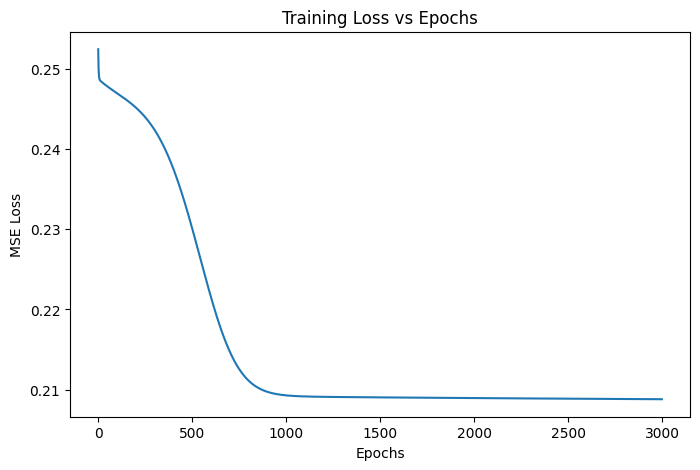

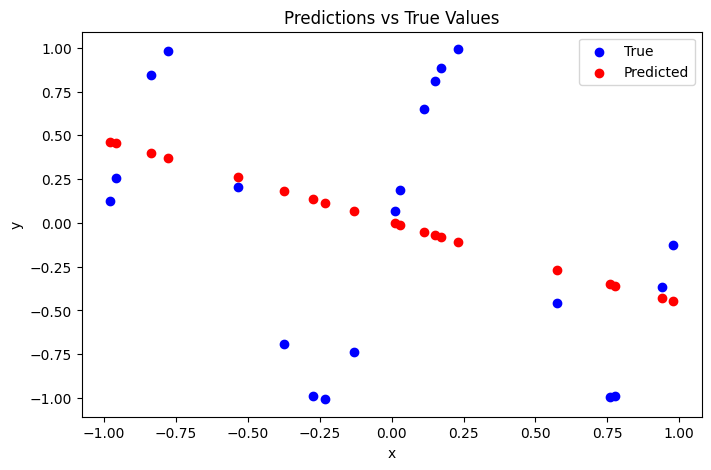

In [32]:
############################################################33
#implementation
#######################################################
#trying with first deepregression model
import numpy as np
import matplotlib.pyplot as plt


# DeepRegression Class

class DeepRegression:
    """One-hidden-layer regression model."""
    def __init__(self, input_size, num_hidden_size):
        self.input_size = input_size
        self.num_hidden_size = num_hidden_size
        self.parameters()

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        # Forward pass
        z = self.hidden_weight @ x.T + self.bias_hidden
        h = self.sigmoid(z)
        y_hat = self.outputweights @ h + self.outputbias
        return y_hat.T, h.T

    def __call__(self, x):
        return self.forward(x)[0]

    def parameters(self):
        self.hidden_weight = np.random.normal(0, 0.1, (self.num_hidden_size, self.input_size))
        self.bias_hidden = np.random.normal(0, 0.1, (self.num_hidden_size, 1))
        self.outputweights = np.random.normal(0, 0.1, (1, self.num_hidden_size))
        self.outputbias = np.random.normal(0, 0.1, (1, 1))
        self.params_dict = {
            "hidden_weights": self.hidden_weight,
            "bias_hidden": self.bias_hidden,
            "output_weight": self.outputweights,
            "outputbias": self.outputbias
        }
        return self.params_dict


# MSERegression Class

class MSERegression:
    def __init__(self, y, y_hat, h, v, x):
        self.y = y
        self.y_hat = y_hat
        self.h = h      # hidden activations
        self.v = v      # output weights
        self.x = x      # input batch

    def loss(self):
        return 0.5 * np.mean((self.y_hat - self.y)**2)

    def backward(self):
        batch_size = self.y.shape[0]

        # Error at output
        dE_dyhat = (self.y_hat - self.y) / batch_size

        # Output layer gradients
        dE_dv = dE_dyhat.T @ self.h          # (1, hidden_size)
        dE_dc = np.sum(dE_dyhat, axis=0, keepdims=True)  # (1,1)

        # Hidden layer gradients
        dE_dh = dE_dyhat @ self.v            # (batch_size, hidden_size)
        dh_dz = self.h * (1 - self.h)
        dE_dz = dE_dh * dh_dz                # (batch_size, hidden_size)

        dE_dw = dE_dz.T @ self.x             # (hidden_size, input_size)
        dE_db = np.sum(dE_dz, axis=0, keepdims=True).T   # (hidden_size,1)

        grads = {
            "output_weight": dE_dv,
            "outputbias": dE_dc,
            "hidden_weights": dE_dw,
            "bias_hidden": dE_db
        }
        return grads


# SGD Optimizer

class OptimizerSGD:
    def __init__(self, parameters, lr=0.01):
        self.parameters = parameters
        self.lr = lr

    def step(self, grads):
        for key in self.parameters:
            self.parameters[key] -= self.lr * grads[key]

    def zero_grad(self, grads):
        for key in grads:
            grads[key].fill(0)


# Generate data

np.random.seed(42)
N = 100
x = np.linspace(-1, 1, N).reshape(-1,1)
y = np.sin(2*np.pi*x) + np.random.normal(0,0.01,size=(N,1))

# Split into training and test sets
idx = np.random.permutation(N)
train_idx = idx[:80]
test_idx = idx[80:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]


# Initialize model, optimizer

model = DeepRegression(input_size=1, num_hidden_size=5)
params = model.parameters()
optimizer = OptimizerSGD(params, lr=0.1)


# Training loop

epochs = 3000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    y_hat, h = model.forward(x_train)

    # Compute loss
    loss_fn = MSERegression(y_train, y_hat, h, model.outputweights, x_train)
    loss_value = loss_fn.loss()
    loss_history.append(loss_value)

    # Backward pass
    grads = loss_fn.backward()

    # Update parameters
    optimizer.step(grads)
    optimizer.zero_grad(grads)

    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1}, Loss={loss_value:.6f}")


#  Plot training loss

plt.figure(figsize=(8,5))
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss vs Epochs")
plt.show()


# Test predictions

y_pred_test, _ = model.forward(x_test)
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, label="True", color='blue')
plt.scatter(x_test, y_pred_test, label="Predicted", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions vs True Values")
plt.legend()
plt.show()


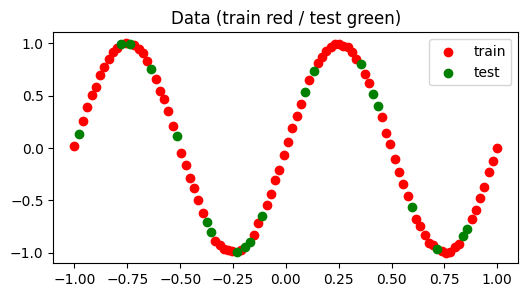

Epoch    1 / 30000  - train loss = 0.253555
Epoch  500 / 30000  - train loss = 0.225113
Epoch 1000 / 30000  - train loss = 0.200123
Epoch 1500 / 30000  - train loss = 0.199781
Epoch 2000 / 30000  - train loss = 0.199723
Epoch 2500 / 30000  - train loss = 0.199673
Epoch 3000 / 30000  - train loss = 0.199629
Epoch 3500 / 30000  - train loss = 0.199592
Epoch 4000 / 30000  - train loss = 0.199559
Epoch 4500 / 30000  - train loss = 0.199530
Epoch 5000 / 30000  - train loss = 0.199505
Epoch 5500 / 30000  - train loss = 0.199482
Epoch 6000 / 30000  - train loss = 0.199462
Epoch 6500 / 30000  - train loss = 0.199444
Epoch 7000 / 30000  - train loss = 0.199427
Epoch 7500 / 30000  - train loss = 0.199412
Epoch 8000 / 30000  - train loss = 0.199399
Epoch 8500 / 30000  - train loss = 0.199386
Epoch 9000 / 30000  - train loss = 0.199375
Epoch 9500 / 30000  - train loss = 0.199364
Epoch 10000 / 30000  - train loss = 0.199354
Epoch 10500 / 30000  - train loss = 0.199345
Epoch 11000 / 30000  - train l

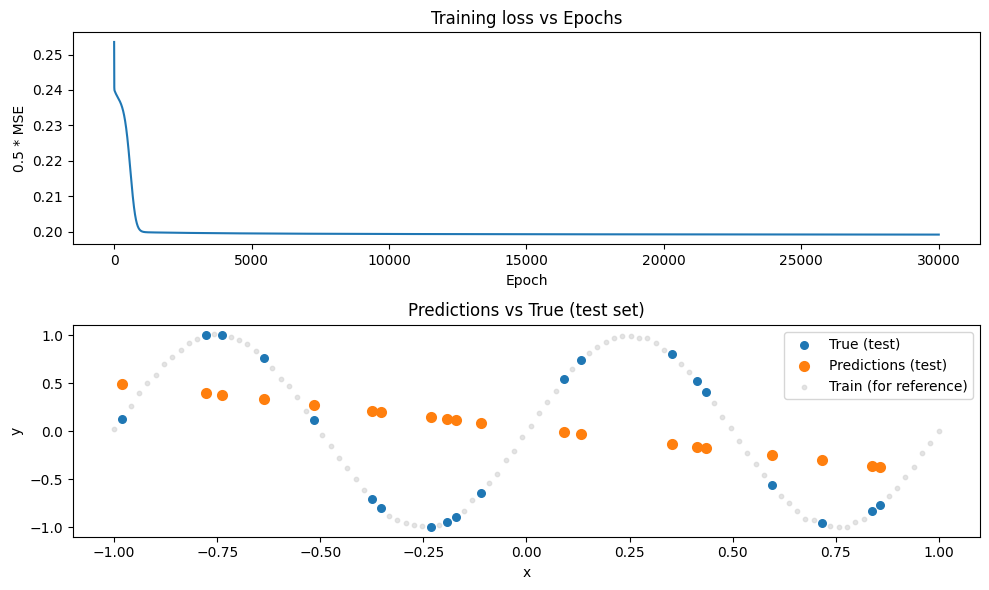

In [33]:
import numpy as np
import matplotlib.pyplot as plt

######################################################
#Trying a different model now using another learning rate and 30000 epochs
#########################################################
def training_test(split: float = 0.8, n_points: int = 100, seed: int = 0):
    """Generate dataset and split into train/test.
    Returns x_train, y_train, x_test, y_test with shapes (N,1).
    """
    rng = np.random.RandomState(seed)
    x = np.linspace(-1, 1, n_points)
    epsilon = rng.normal(0, 0.01, n_points)
    y = np.sin(2 * np.pi * x) + epsilon

    # shuffle
    indices = np.arange(n_points)
    rng.shuffle(indices)
    x = x[indices]
    y = y[indices]

    sh = int(split * n_points)
    x_train = x[:sh].reshape(-1, 1)
    y_train = y[:sh].reshape(-1, 1)
    x_test = x[sh:].reshape(-1, 1)
    y_test = y[sh:].reshape(-1, 1)
    return x_train, y_train, x_test, y_test


# Model

class DeepRegression2:
    """Single hidden layer regression network.
    Hidden: sigmoid, Output: linear.
    Parameter shapes:
      hidden_weights: (hidden_size, input_size)
      bias_hidden: (1, hidden_size)
      output_weight: (1, hidden_size)
      outputbias: (1, 1)
    """
    def __init__(self, input_size: int, num_hidden_size: int, seed: int = None):
        if seed is not None:
            np.random.seed(seed)
        self.input_size = input_size
        self.num_hidden_size = num_hidden_size
        self.parameters()

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def forward(self, x):
        """Forward pass. x shape: (N, input_size)
        Returns (y_hat, hidden_activations)
        """
        # z: (N, hidden_size)
        z = x @ self.hidden_weights.T + self.bias_hidden  # broadcasting bias (1,hidden)
        h = self.sigmoid(z)                                # (N, hidden_size)
        y_hat = h @ self.output_weight.T + self.outputbias # (N,1)
        return y_hat, h

    def __call__(self, x):
        return self.forward(x)[0]

    def parameters(self):
        # initialize parameters ~ N(0, 0.1)
        self.hidden_weights = np.random.normal(0, 0.1, (self.num_hidden_size, self.input_size))
        self.bias_hidden = np.random.normal(0, 0.1, (1, self.num_hidden_size))
        self.output_weight = np.random.normal(0, 0.1, (1, self.num_hidden_size))
        self.outputbias = np.random.normal(0, 0.1, (1, 1))

        # dict used by optimizer (kept as references to the arrays)
        self.params = {
            "hidden_weights": self.hidden_weights,
            "bias_hidden": self.bias_hidden,
            "output_weight": self.output_weight,
            "outputbias": self.outputbias
        }
        return self.params


# Loss + Backprop

class MSERegression:
    """MSE loss for regression and analytical backprop gradients.
    Inputs:
      y: (N,1)
      y_hat: (N,1)
      h: (N,hidden)
      v: (1,hidden) -- output weights
      x: (N,input)
    """
    def __init__(self, y, y_hat, h, v, x):
        self.y = y
        self.y_hat = y_hat
        self.h = h
        self.v = v
        self.x = x

    def loss(self):
        return 0.5 * np.mean((self.y_hat - self.y) ** 2)

    def backward(self):
        N = self.y.shape[0]
        # dE/dy_hat: (N,1)
        dE_dyhat = (self.y_hat - self.y) / N

        # output layer grads
        # dE/dv: (1, hidden)
        dE_dv = dE_dyhat.T @ self.h

        # output bias grad: (1,1)
        dE_dc = np.sum(dE_dyhat, axis=0, keepdims=True)

        # propagate to hidden: (N, hidden)
        dE_dh = dE_dyhat @ self.v   # (N,1) @ (1,hidden) -> (N,hidden)
        dh_dz = self.h * (1 - self.h)  # (N,hidden)
        dE_dz = dE_dh * dh_dz          # (N,hidden) elementwise

        # hidden weights & bias grads
        # dE/dw: (hidden, input)
        dE_dw = dE_dz.T @ self.x
        # dE/db_hidden: (1, hidden)
        dE_db = np.sum(dE_dz, axis=0, keepdims=True)

        grads = {
            "output_weight": dE_dv,
            "outputbias": dE_dc,
            "hidden_weights": dE_dw,
            "bias_hidden": dE_db
        }
        return grads


# Optimizer (SGD)

class OptimizerSGD:
    def __init__(self, parameters, lr: float = 0.001):
        self.parameters = parameters
        self.lr = lr

    def step(self, grads):
        for key in self.parameters:
            # in-place update so model params (arrays) are changed
            self.parameters[key] -= self.lr * grads[key]

#training
if __name__ == "__main__":
    # reproducibility
    SEED = 0
    np.random.seed(SEED)

    # data
    x_train, y_train, x_test, y_test = training_test(split=0.8, n_points=100, seed=SEED)

    # quick visual of data split (optional)
    plt.figure(figsize=(6,3))
    plt.scatter(x_train[:,0], y_train[:,0], color='red', label='train')
    plt.scatter(x_test[:,0], y_test[:,0], color='green', label='test')
    plt.legend()
    plt.title("Data (train red / test green)")
    plt.show()

    # model + optimizer
    model = DeepRegression2(input_size=1, num_hidden_size=5, seed=1)
    optimizer = OptimizerSGD(model.params, lr=0.1)

    epochs = 30000
    losses = []

    for epoch in range(epochs):
        y_hat, h = model.forward(x_train)                  # (N,1), (N,hidden)
        loss_obj = MSERegression(y_train, y_hat, h, model.output_weight, x_train)
        loss_value = loss_obj.loss()
        losses.append(loss_value)

        grads = loss_obj.backward()
        optimizer.step(grads)

        if (epoch + 1) % 500 == 0 or epoch == 0:
            print(f"Epoch {epoch+1:4d} / {epochs}  - train loss = {loss_value:.6f}")

    # final evaluation on test set
    y_pred_test, _ = model.forward(x_test)
    test_loss = 0.5 * np.mean((y_pred_test - y_test) ** 2)
    print(f"\nFinal test loss (0.5*MSE): {test_loss:.6f}")

   #plot
    plt.figure(figsize=(10, 6))

    # training loss vs epochs
    plt.subplot(2, 1, 1)
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("0.5 * MSE")
    plt.title("Training loss vs Epochs")

    # predictions vs true values (test set) plotted against x
    plt.subplot(2, 1, 2)
    # sort test by x for nicer curve plotting
    idx = np.argsort(x_test[:, 0])
    x_test_s = x_test[idx, 0]
    y_test_s = y_test[idx, 0]
    y_pred_s = y_pred_test[idx, 0]

    plt.scatter(x_test[:, 0], y_test[:, 0], label="True (test)", s=30)
    plt.scatter(x_test_s, y_pred_s, label="Predictions (test)", linewidth=2)
    plt.scatter(x_train[:, 0], y_train[:, 0], color='lightgray', alpha=0.6, label='Train (for reference)', s=10)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Predictions vs True (test set)")

    plt.tight_layout()
    plt.show()


# Comments about the plot:
both models are underfitting and not learning well the behavior of the true labels. Mainly because we only have 1 hidden layer with 5 units making this model too simple. Also, because we only have 100 points (80 for training) makes this model very simple. To improve we can add more hidden layers with more activation functions, more data, etc.
